#Task:
1. Display all divvy stations that are currently in service.
2. Make an interactive plot/visualization that shows the location of these stations on a map.
3. Perform K Means clustering on these points using the distance between the stations as the metric.
4. Create a new column in the dataset for clusters and assign the values of clusters to the stations.
5. Create an interactive plot/visualization that shows the location of these stations along with which cluster they belong to.

#Use case:
Our main goal is to improve accuracy of the divvy ecosystem as a whole. However, if we try to evaluate the efficiency of all stations together, before and after our improvements, the results would not be quite indicative of the improvement since Chicago is a large city. For this reason, we came up with the idea of splitting the stations into multiple regions. The reason why we have performed clustering on these stations is so that we have separate regions to work with and we can show analysis for the efficiency and the suggestions for new stations based on these regions rather than Chicago as whole. The task of splitting the stations into regions is an unsupervised task as we do not have the number of regions. Hence we decided to cluster these stations using distance as the metric.

#Analysis:
1. All stations currently in service have been displayed.
2. All stations currently in service have been plotted interactively.
3. K Means clustering has been performed on all stations for different values and the optimal value of K has been decided by our knowledge of the areas in Chicago and using our eye as judge. (We tried the elbow method and it shows that the inertia/error becomes flattened after about 5 clusters. However, this did not seem right to us and hence we decided to try various values for K and we decided on the value 25 as it was able to separate Chicago perfectly into various regions such as UIC, Downtown, West Loop, Illinois Tech, UofChicago, etc.)
4. The stations after clustering have been plotted interactively.

Note: Since there are interactive plots, they will not be visible on github. The plots can be seen by going to the [Colab file](https://colab.research.google.com/drive/1vtdAJQ0Mbzv0w29x9y3TAKjx-O-GRedx?usp=sharing)

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Divvy_Bicycle_Stations_-_In_Service.csv")

df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Note: This is just a screenshot of the plot to show what it looks like. The actual plot is interactive and you can zoom in/out and it also shows the respective latitude and longitude. The actual plot can be seen by going to the [Colab file](https://colab.research.google.com/drive/1vtdAJQ0Mbzv0w29x9y3TAKjx-O-GRedx?usp=sharing)

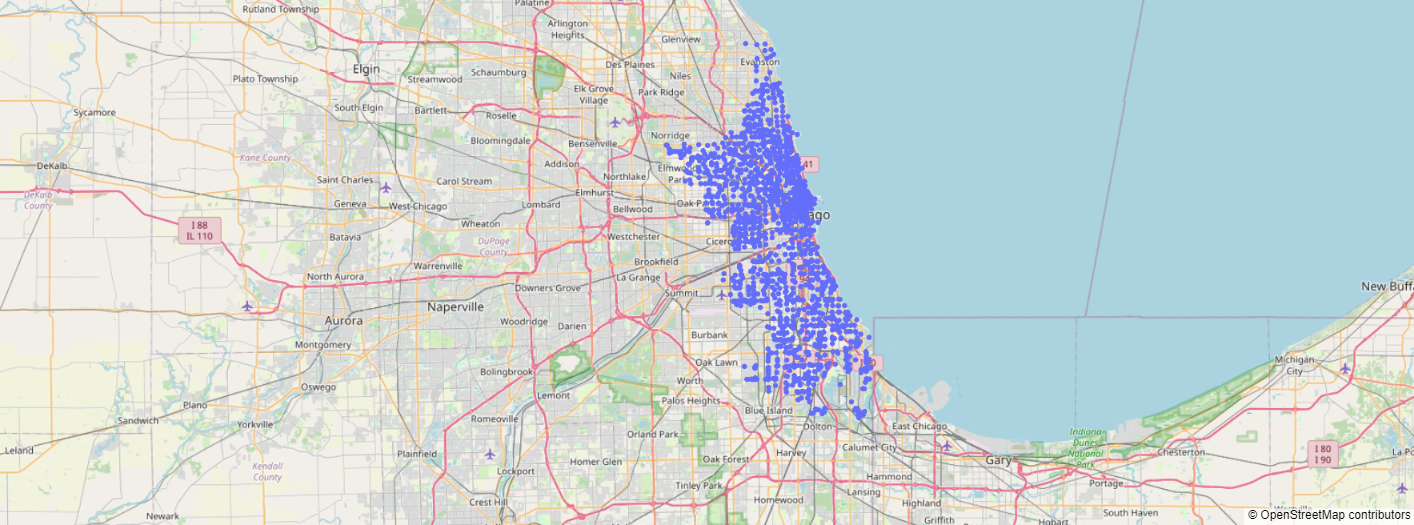

In [ ]:
stations = pd.read_csv("Divvy_Bicycle_Stations_-_In_Service.csv")
stations

,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,1594046383808271024,Troy St & Jackson Blvd,9,9,In Service,41.877505,-87.704850,"(41.877505, -87.70485)"
1,641,Central Park Ave & Bloomingdale Ave,11,11,In Service,41.914166,-87.716755,"(41.914166, -87.716755)"
2,1683527931525155814,Public Rack - Cornell Ave & 87th Pl,1,1,In Service,41.736881,-87.583146,"(41.73688127, -87.58314552)"
3,367,Racine Ave & 35th St,15,15,In Service,41.830689,-87.656211,"(41.83068856472101, -87.65621066093445)"
4,1673852313397164648,Public Rack - Francisco Ave & Touhy Ave,2,2,In Service,42.011865,-87.701317,"(42.011865, -87.701317)"
...,...,...,...,...,...,...,...,...
1411,20,Sheffield Ave & Kingsbury St,15,15,In Service,41.910522,-87.653106,"(41.910522, -87.653106)"
1412,54,Ogden Ave & Chicago Ave,19,19,In Service,41.896362,-87.654061,"(41.896362458, -87.6540612729)"
1413,693,Baltimore Ave & 87th St,15,15,In Service,41.737336,-87.548515,"(41.737335600416664, -87.54851460456847)"
1414,718,Ewing Ave & Burnham Greenway,11,11,In Service,41.712749,-87.534814,"(41.71274876109496, -87.53481388092041)"


In [ ]:
features = stations[['Latitude', 'Longitude']]
print(features)

       Latitude  Longitude
0     41.877505 -87.704850
1     41.914166 -87.716755
2     41.736881 -87.583146
3     41.830689 -87.656211
4     42.011865 -87.701317
...         ...        ...
1411  41.910522 -87.653106
1412  41.896362 -87.654061
1413  41.737336 -87.548515
1414  41.712749 -87.534814
1415  41.883602 -87.648627

[1416 rows x 2 columns]


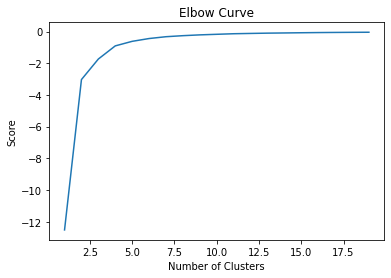

In [ ]:
K_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = stations[['Latitude']]
X_axis = stations[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
# create kmeans model/object
kmeans = KMeans(
    init="random",
    n_clusters=25, #Choosing 25 because that gave the best clusters after trial and error
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
# do clustering
kmeans.fit(features)
# save results
labels = kmeans.labels_

In [ ]:
print(labels)
print(len(labels))
print(np.unique(labels))

[19 11 22 ...  0 10  1]
1416
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [ ]:
stations["cluster"] = labels

In [ ]:
stations

,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location,cluster
0,1594046383808271024,Troy St & Jackson Blvd,9,9,In Service,41.877505,-87.704850,"(41.877505, -87.70485)",19
1,641,Central Park Ave & Bloomingdale Ave,11,11,In Service,41.914166,-87.716755,"(41.914166, -87.716755)",11
2,1683527931525155814,Public Rack - Cornell Ave & 87th Pl,1,1,In Service,41.736881,-87.583146,"(41.73688127, -87.58314552)",22
3,367,Racine Ave & 35th St,15,15,In Service,41.830689,-87.656211,"(41.83068856472101, -87.65621066093445)",5
4,1673852313397164648,Public Rack - Francisco Ave & Touhy Ave,2,2,In Service,42.011865,-87.701317,"(42.011865, -87.701317)",13
...,...,...,...,...,...,...,...,...,...
1411,20,Sheffield Ave & Kingsbury St,15,15,In Service,41.910522,-87.653106,"(41.910522, -87.653106)",14
1412,54,Ogden Ave & Chicago Ave,19,19,In Service,41.896362,-87.654061,"(41.896362458, -87.6540612729)",15
1413,693,Baltimore Ave & 87th St,15,15,In Service,41.737336,-87.548515,"(41.737335600416664, -87.54851460456847)",0
1414,718,Ewing Ave & Burnham Greenway,11,11,In Service,41.712749,-87.534814,"(41.71274876109496, -87.53481388092041)",10


In [ ]:
fig = px.scatter_mapbox(stations, lat="Latitude", lon="Longitude", color="cluster")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Note: This is just a screenshot of the plot to show what it looks like. The actual plot is interactive and you can zoom in/out and it also shows the respective latitude and longitude. The actual plot can be seen by going to the [Colab file](https://colab.research.google.com/drive/1vtdAJQ0Mbzv0w29x9y3TAKjx-O-GRedx?usp=sharing)

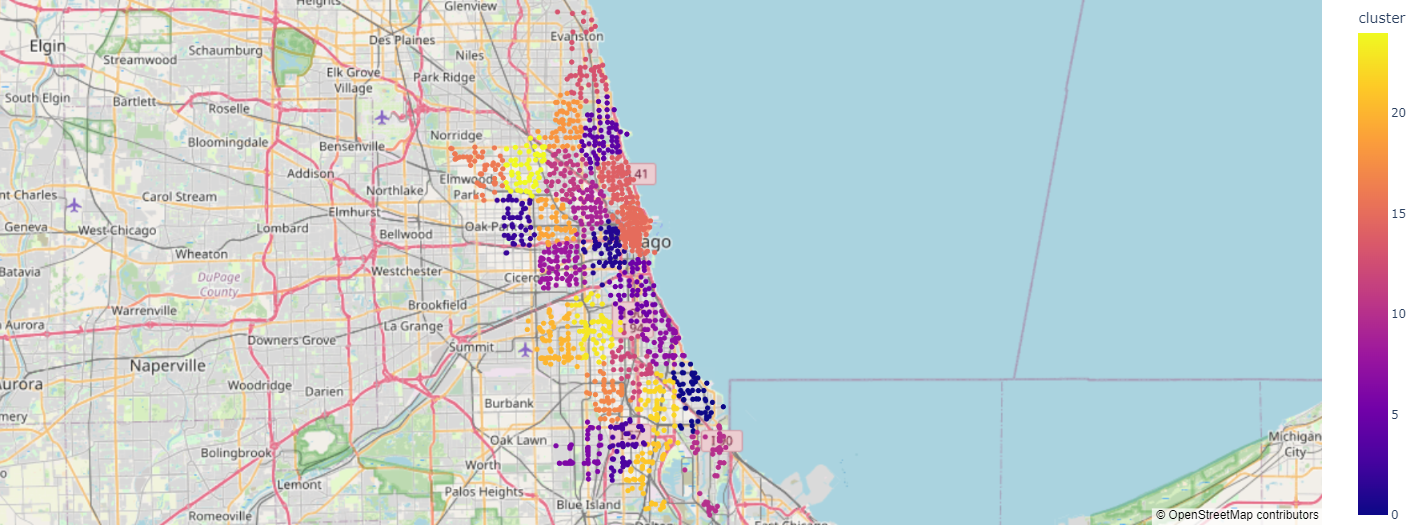